In [17]:
import os

import matplotlib.pyplot as plt
import numpy as np

In [18]:
# I'm assuming there's only one seed (one results inside of the dir)
RESULTS_DIR = "abc"
metrics = np.load(os.path.join(RESULTS_DIR, "metrics.npy"), allow_pickle=True).item()

In [19]:
# Metrics is a nested dict with the following structure:
# metrics[shot][class]
# where each element is the list of metrics for each image from that class
metrics

{1: {48: [{'acc': 0.9850514729817709,
    'jacc': 0.8878586691086691,
    'avg_acc': 0.9850514729817709,
    'avg_jacc': 0.8878586691086691,
    'tps': [23269],
    'fps': [289],
    'tns': [170400],
    'fns': [2650]},
   {'acc': 0.9924468994140625,
    'jacc': 0.9430969076905391,
    'avg_acc': 0.9924468994140625,
    'avg_jacc': 0.9430969076905391,
    'tps': [24612],
    'fps': [178],
    'tns': [170511],
    'fns': [1307]}],
  66: [{'acc': 0.8718588917525774,
    'jacc': 0.0,
    'avg_acc': 0.8718588917525774,
    'avg_jacc': 0.0,
    'tps': [0],
    'fps': [0],
    'tns': [216500],
    'fns': [31820]},
   {'acc': 0.860961662371134,
    'jacc': 0.0,
    'avg_acc': 0.860961662371134,
    'avg_jacc': 0.0,
    'tps': [0],
    'fps': [2706],
    'tns': [213794],
    'fns': [31820]}]},
 2: {48: [{'acc': 0.8681691487630209,
    'jacc': 0.0,
    'avg_acc': 0.8681691487630209,
    'avg_jacc': 0.0,
    'tps': [0],
    'fps': [0],
    'tns': [170689],
    'fns': [25919]},
   {'acc': 0.86816

Text(0.5, 1.0, 'Accuracy vs Shots for each class')

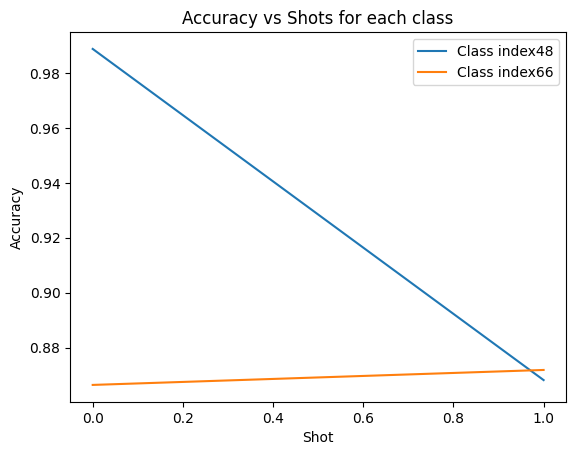

In [32]:
classes = metrics[1].keys()
for c in classes:
    ms = []
    for shot in metrics.keys():
        m = np.mean([x["acc"] for x in metrics[shot][c]])
        ms.append(m)
    plt.plot(ms, label=f"Class index{c}")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Shot")
plt.title("Accuracy vs Shots for each class")

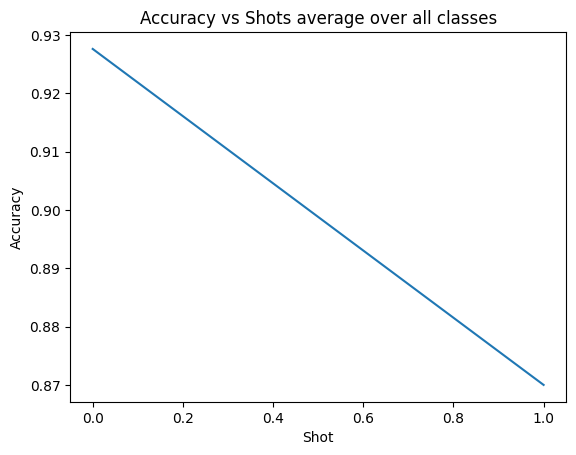

In [36]:
ms = []
for shot in metrics.keys():
    m = []
    for c in metrics[shot].keys():
        m.append(np.mean([x["acc"] for x in metrics[shot][c]]))
    ms.append(np.mean(m))

plt.figure()
plt.plot(ms)
plt.ylabel("Accuracy")
plt.xlabel("Shot")
plt.title("Accuracy vs Shots average over all classes")
plt.show()